# COUNT NULL VALUES FOR VIDEOS THAT COULN'T BE ANALYZED

In [2]:
import pickle as pkl
import numpy as np

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

vectores_zero = []

for i in range(len(features)):
    if np.all(features[i]["feature_vector"] == 0):
        vectores_zero.append(i)

print(len(vectores_zero))

60


# GET THE LABELS FOR THE DATA

In [3]:
from sklearn.preprocessing import LabelEncoder

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

labels = set()

for i in range(len(features)):
    labels.add(features[i]["label"])

le = LabelEncoder()
le.fit(list(labels))

LabelEncoder()

# REDUCE DIMENSIONALITY OF THE DATA WITH PCA

In [4]:
from sklearn.decomposition import PCA

# TRAIN DATA WITH PCA

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_train = []
y_train = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_train.append(features[i]["feature_vector"])
        y_train.append(features[i]["label"])

X_train = np.array(X_train)
y_train = le.transform(y_train)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_train = scaler.fit_transform(X_train)


pca = PCA(n_components=0.9)
X_train_reducido = pca.fit_transform(X_train)

print(X_train_reducido.shape)

# VALIDATION DATA WITH PCA

with open('video_features/vector_features/val_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_val = []
y_val = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_val.append(features[i]["feature_vector"])
        y_val.append(features[i]["label"])

X_val = np.array(X_val)
y_val = le.transform(y_val)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_val = scaler.fit_transform(X_val)

X_val_reducido = pca.transform(X_val)

print(X_val_reducido.shape)

(5372, 315)
(421, 315)


# REDUCE DIMENTIONALITY OF THE DATA WITH LDA

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import pyplot as plt


# TRAIN DATA WITH LDA

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_train = []
y_train = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_train.append(features[i]["feature_vector"])
        y_train.append(features[i]["label"])

X_train = np.array(X_train)
y_train = le.transform(y_train)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_train = scaler.fit_transform(X_train)

lda = LDA(n_components=9)
X_train_reducido = lda.fit_transform(X_train, y_train)

# VALIDATION DATA WITH LDA

with open('video_features/vector_features/val_10_fixed_features.pkl', 'rb') as f:
    val_features = pkl.load(f)

# Preparar los datos de validación
X_val = []
y_val = []
for i in range(len(val_features)):
    if not np.all(val_features[i]["feature_vector"] == 0):
        X_val.append(val_features[i]["feature_vector"])
        y_val.append(val_features[i]["label"])

X_val = np.array(X_val)
y_val = le.transform(y_val)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_val = scaler.fit_transform(X_val)

# Transformar los datos de validación con el mismo LDA ajustado
X_val_reducido = lda.transform(X_val)

# Variance ratio of each component
explained_variance_ratio = lda.explained_variance_ratio_

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por los componentes discriminantes de LDA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de la varianza explicada')
plt.legend(loc='best')
plt.show()

# Imprimir las etiquetas únicas en los conjuntos de datos
print(f"Etiquetas únicas en y_train: {np.unique(y_train)}")
print(f"Etiquetas únicas en y_val: {np.unique(y_val)}")

# REDUCE DIMENTIONALITY OF THE DATA WITH RANDOM PROJECTION

In [28]:
from sklearn.random_projection import GaussianRandomProjection

n = features[0]["feature_vector"].shape[0]
print(n)
epsilon = 0.5
k = int(np.ceil(20*np.log2(n) / (epsilon**2)))
print(k)

# TRAIN DATA WITH RANDOM PROJECTION

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_train = []
y_train = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_train.append(features[i]["feature_vector"])
        y_train.append(features[i]["label"])

X_train = np.array(X_train)
y_train = le.transform(y_train)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_train = scaler.fit_transform(X_train)

grp = GaussianRandomProjection(n_components=k)
X_train_reducido = grp.fit_transform(X_train)

# VALIDATION DATA WITH RANDOM PROJECTION

with open('video_features/vector_features/val_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_val = []
y_val = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_val.append(features[i]["feature_vector"])
        y_val.append(features[i]["label"])

X_val = np.array(X_val)
y_val = le.transform(y_val)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l2')
X_val = scaler.fit_transform(X_val)

X_val_reducido = grp.transform(X_val)


1024
800


# REDUCE DIMENTIONALITY OF THE DATA WITH SVD

In [31]:
from sklearn.decomposition import TruncatedSVD

# TRAIN DATA WITH SVD

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_train = []
y_train = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_train.append(features[i]["feature_vector"])
        y_train.append(features[i]["label"])

X_train = np.array(X_train)
y_train = le.transform(y_train)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_train = scaler.fit_transform(X_train)


svd = TruncatedSVD(n_components=10)
X_train_reducido = svd.fit_transform(X_train)

# VALIDATION DATA WITH SVD

with open('video_features/vector_features/val_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_val = []
y_val = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_val.append(features[i]["feature_vector"])
        y_val.append(features[i]["label"])

X_val = np.array(X_val)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_val = scaler.fit_transform(X_val)

X_val_reducido = svd.transform(X_val)


# REDUCE DIMENTIONALITY OF THE DATA WITH FA

In [74]:
from sklearn.decomposition import FactorAnalysis as FA

# TRAIN DATA WITH FA

with open('video_features/vector_features/train_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_train = []
y_train = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_train.append(features[i]["feature_vector"])
        y_train.append(features[i]["label"])

X_train = np.array(X_train)
y_train = le.transform(y_train)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_train = scaler.fit_transform(X_train)

fa = FA(n_components=10)
X_train_reducido = fa.fit_transform(X_train)

# VALIDATION DATA WITH FA

with open('video_features/vector_features/val_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_val = []
y_val = []

for i in range(len(features)):
    if not np.all(features[i]["feature_vector"] == 0):
        X_val.append(features[i]["feature_vector"])
        y_val.append(features[i]["label"])

X_val = np.array(X_val)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_val = scaler.fit_transform(X_val)

X_val_reducido = fa.transform(X_val)

# USE KMEANS TO CLUSTER THE DATA

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_reducido)

# Predecir los clusters en los datos de validación
y_val_pred = kmeans.predict(X_val_reducido)

# Calcular e imprimir el Silhouette Score y el Adjusted Rand Index
sil_score = silhouette_score(X_val_reducido, y_val_pred)
ari_score = adjusted_rand_score(y_val, y_val_pred)

print(f"Dimensiones reducidas: {X_train_reducido.shape}")
print(f"Silhouette Score: {sil_score}")
print(f"Adjusted Rand Index: {ari_score}")

Dimensiones reducidas: (5372, 9)
Silhouette Score: 0.46314652947343443
Adjusted Rand Index: 0.8341043435627986


# Create dendrogram

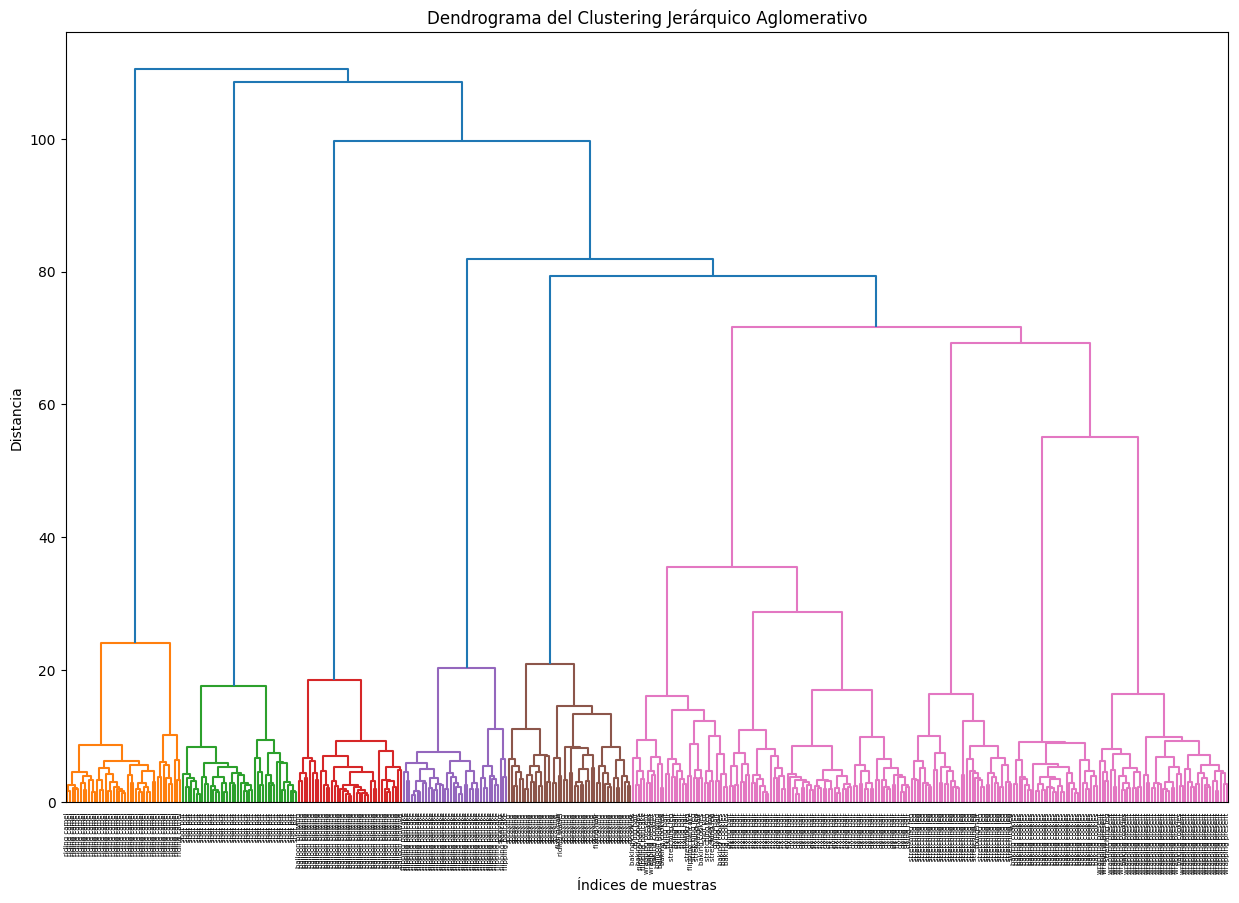

In [77]:
# create dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Aplicar clustering jerárquico y crear el dendrograma
Z = linkage(X_val_reducido, method='ward')

# Crear el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=le.inverse_transform(y_val))
plt.title("Dendrograma del Clustering Jerárquico Aglomerativo")
plt.xlabel("Índices de muestras")
plt.ylabel("Distancia")
plt.show()

# USE AGGLOMERATIVE CLUSTERING TO CLUSTER THE DATA

In [43]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score
from Agglomerative import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=10)
agg.fit(X_train_reducido)

# Predecir los clusters en los datos de validación
y_val_pred = agg.fit_predict(X_val_reducido)

# Calcular e imprimir el Silhouette Score y el Adjusted Rand Index
sil_score = silhouette_score(X_val_reducido, y_val_pred)
ari_score = adjusted_rand_score(y_val, y_val_pred)
mutual_score = mutual_info_score(y_val, y_val_pred)

print(f"Dimensiones reducidas: {X_train_reducido.shape}")
print(f"Silhouette Score: {sil_score}")
print(f"Adjusted Rand Index: {ari_score}")
print(f"Mutual Information Score: {mutual_score}")


Dimensiones reducidas: (5372, 9)
Silhouette Score: 0.41203375158160316
Adjusted Rand Index: 0.6822967218279655
Mutual Information Score: 1.761621792504495


# Draw clusters

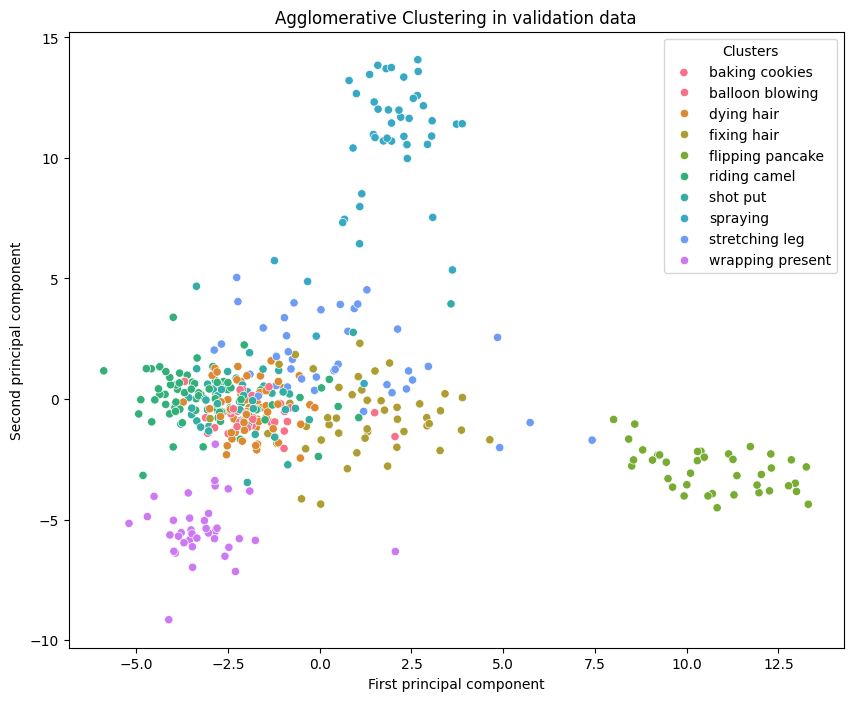

Etiquetas únicas en y_train: [0 1 2 3 4 5 6 7 8 9]
Etiquetas únicas en y_val: [0 1 2 3 4 5 6 7 8 9]
Clusters únicos en y_val_pred: [ 0  1  2  4  5  7  9 12 35 60]


In [71]:
# Mapear clusters predichos a una secuencia continua
import seaborn as sns

# Mapear los clusters predichos a una secuencia continua
cluster_le = LabelEncoder()
y_val_pred_continuous = cluster_le.fit_transform(y_val_pred)

# Crear el gráfico de dispersión usando seaborn con una mejor paleta de colores
plt.figure(figsize=(10, 8))
palette = sns.color_palette("husl", len(np.unique(y_val_pred_continuous)))
scatter_plot = sns.scatterplot(x=X_val_reducido[:, 0], y=X_val_reducido[:, 1], hue=y_val_pred_continuous, palette=palette, legend='full')

# Añadir título y etiquetas de los ejes
scatter_plot.set_title("Agglomerative Clustering in validation data")
scatter_plot.set_xlabel("First principal component")
scatter_plot.set_ylabel("Second principal component")

# Crear leyenda con las etiquetas originales
legend_labels = le.inverse_transform(range(len(np.unique(y_val_pred_continuous))))
legend_labels = [f"{label}" for label in legend_labels]

# Ajustar la leyenda
scatter_plot.legend(title="Clusters", loc='best', labels=legend_labels)

# Mostrar el gráfico
plt.show()

# Imprimir las etiquetas únicas en los conjuntos de datos
print(f"Etiquetas únicas en y_train: {np.unique(y_train)}")
print(f"Etiquetas únicas en y_val: {np.unique(y_val)}")
print(f"Clusters únicos en y_val_pred: {np.unique(y_val_pred)}")

# TEST DATA

In [16]:
with open ('video_features/vector_features/test_10_fixed_features.pkl', 'rb') as f:
    features = pkl.load(f)

X_test = []
X = []
y_test = []

for i in range(len(features)):
    X_test.append(features[i]["feature_vector"])
    X.append(features[i]["youtube_id"])

X_test = np.array(X_test)

# Normalizamos los datos con l2
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_test = scaler.fit_transform(X_test)

X_test_reducido = lda.transform(X_test)

# Predecir los clusters en los datos de test
y_test_pred = kmeans.predict(X_test_reducido)

print(len(y_test_pred))

#save youtube_id and cluster in a csv file
import pandas as pd

data = {"youtube_id": X, "label": y_test_pred}
df = pd.DataFrame(data)
df.to_csv('test_clusters.csv', index=False)


805
